In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
import numpy as np
from vae.arch import VAE
from gan.arch import GAN
import matplotlib.pyplot as plt
import os
from IPython import display
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
from tensorflow.keras.utils import plot_model

np.set_printoptions(precision=4, suppress = True)

In [3]:
vae = VAE()
vae.set_weights('./vae/weights.h5')

In [4]:
DIR_NAME = './data/rollout/'
file = os.listdir(DIR_NAME)[200]
print(file)
obs_data = np.load(DIR_NAME + file)['obs']
print(obs_data.shape)

69526869.npz
(300, 64, 64, 3)


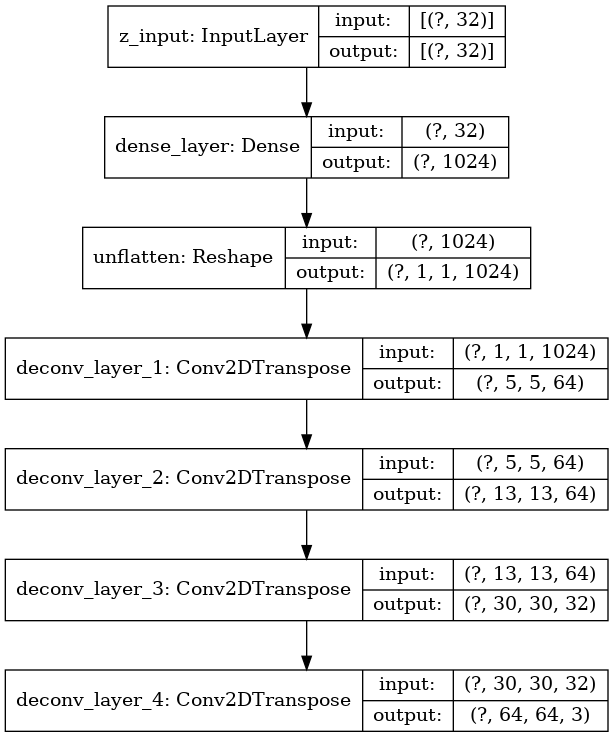

In [5]:
plot_model(vae.encoder, to_file='./vae/encoder.png', show_shapes=True)
plot_model(vae.decoder, to_file='./vae/decoder.png', show_shapes=True)

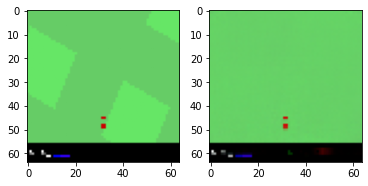

KeyboardInterrupt: 

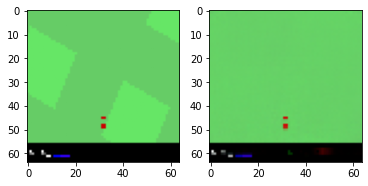

In [6]:
### output from one episode

for idx in range(0,300):
    plt.gca().cla() 
    
    obs = obs_data[idx]
    z_decoded = vae.full_model.predict(np.array([obs]))[0]
    
    plt.subplot(121)
    plt.imshow( obs)
    plt.subplot(122)
    plt.imshow( z_decoded)
    
#     plt.show()
    display.clear_output(wait=True)
    display.display(plt.gcf()) 

In [9]:
gan = GAN()
gan.set_weights('./gan/weights.h5')

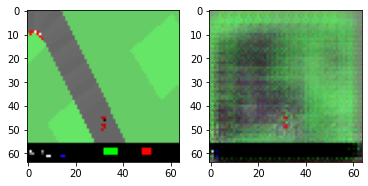

KeyboardInterrupt: 

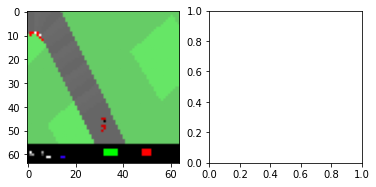

In [10]:
for idx in range(0,300):
    plt.gca().cla() 
    
    obs = obs_data[idx]
    z_decoded = gan.full_model.predict(np.array([obs]))[0]
    
    plt.subplot(121)
    plt.imshow( obs)
    plt.subplot(122)
    plt.imshow( z_decoded)
    
#     plt.show()
    display.clear_output(wait=True)
    display.display(plt.gcf())

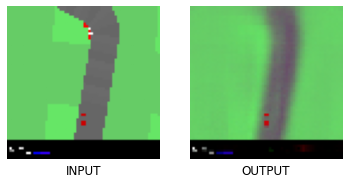

In [7]:
### output from the full_model
DIR_NAME = './data/rollout/'
file = os.listdir(DIR_NAME)[179]
obs_data = np.load(DIR_NAME + file)['obs']

obs = obs_data[50]
reconstruction = vae.full_model.predict(np.array([obs]))[0]

ax1 = plt.subplot(121)
plt.imshow( obs)
ax1.axis('off')
ax1.text(0.5,-0.1, "INPUT", size=12, ha="center", 
         transform=ax1.transAxes)

ax2 = plt.subplot(122)
plt.imshow( reconstruction)
ax2.axis('off')
ax2.text(0.5,-0.1, "OUTPUT", size=12, ha="center", 
         transform=ax2.transAxes);


In [8]:
mus, log_vars, _  = vae.encoder.predict(np.array([obs]))
mu = mus[0]
log_var = log_vars[0]
print("mu = " + str(mu))
print("log_var = " + str(log_var))

encoded_z = vae.encoder.predict(np.array([obs]))[0]
print("z = " + str(encoded_z))

mu = [-0.1035  0.0081  0.0335  0.4733  0.0886 -0.0184  0.0282  0.1031  0.2309
  0.0827 -0.1683  0.2318 -0.0936 -0.0014  1.6743  0.0203 -0.0057  0.1659
  0.6736  0.0801 -0.1327 -1.2644 -0.0005  0.035   0.0414  0.0027  0.0534
 -0.0697  0.6434 -0.1586  0.1426 -0.0293]
log_var = [ 0.0293  0.048  -0.4943 -0.3201 -0.0608 -0.1065  0.0305 -0.2749 -4.3216
 -0.0309 -0.1815 -1.5451 -0.1029 -0.0313 -2.7036  0.012  -1.0074 -0.0285
 -1.5703 -0.1154 -0.0129 -1.8807  0.0001 -0.0512  0.0519 -0.0946 -0.0347
 -0.1438 -0.6606 -0.0348 -0.0378 -0.0859]
z = [[-0.1035  0.0081  0.0335  0.4733  0.0886 -0.0184  0.0282  0.1031  0.2309
   0.0827 -0.1683  0.2318 -0.0936 -0.0014  1.6743  0.0203 -0.0057  0.1659
   0.6736  0.0801 -0.1327 -1.2644 -0.0005  0.035   0.0414  0.0027  0.0534
  -0.0697  0.6434 -0.1586  0.1426 -0.0293]]


informative dimensions:


array([ 8, 11, 14, 16, 18, 21, 28])

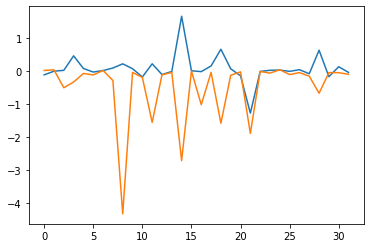

In [9]:
plt.plot(mu);
plt.plot(log_var);
print('informative dimensions:')
hot_zs = np.where(abs(log_var) > 0.5)[0]
hot_zs

In [10]:
file1 = os.listdir(DIR_NAME)[100]
obs_data1 = np.load(DIR_NAME + file)['obs']
file2 = os.listdir(DIR_NAME)[140]
obs_data2 = np.load(DIR_NAME + file)['obs']

In [11]:
vae.encoder.predict(np.array([obs_data1[20]]))

[array([[ 0.0358, -0.0279,  0.064 ,  0.0001,  0.0146,  0.0104, -0.0419,
         -0.0423, -1.5752, -0.0703,  0.0719, -0.0957,  0.0386, -0.0554,
          1.3522, -0.0408,  0.0282, -0.0357,  0.4679, -0.0619,  0.0074,
         -0.2653, -0.0341,  0.0234,  0.0202,  0.0557, -0.0571,  0.136 ,
         -0.0827,  0.0746,  0.0134, -0.0001]], dtype=float32),
 array([[-0.0425, -0.0364, -0.2937, -0.0587, -0.1115, -0.0023,  0.0136,
         -0.0943, -2.6771, -0.0031, -0.07  , -0.4703,  0.0033, -0.0559,
         -2.7347, -0.0288, -0.5464, -0.006 , -1.0551, -0.0362,  0.0421,
         -1.413 , -0.011 ,  0.0163,  0.0234, -0.0423, -0.0173, -0.1343,
         -0.1268, -0.0454, -0.052 ,  0.0056]], dtype=float32),
 array([[ 1.5071, -0.3783, -0.0168,  1.0829,  1.3471, -0.5981,  0.5879,
          0.4993, -1.7942, -0.8134,  0.5719,  0.4271, -0.6411, -0.2676,
          1.45  ,  1.037 , -0.0894, -1.5154,  0.1303, -0.8152, -0.8573,
         -0.138 , -0.9846, -1.2281, -0.7671,  1.0504,  0.0384,  0.253 ,
          

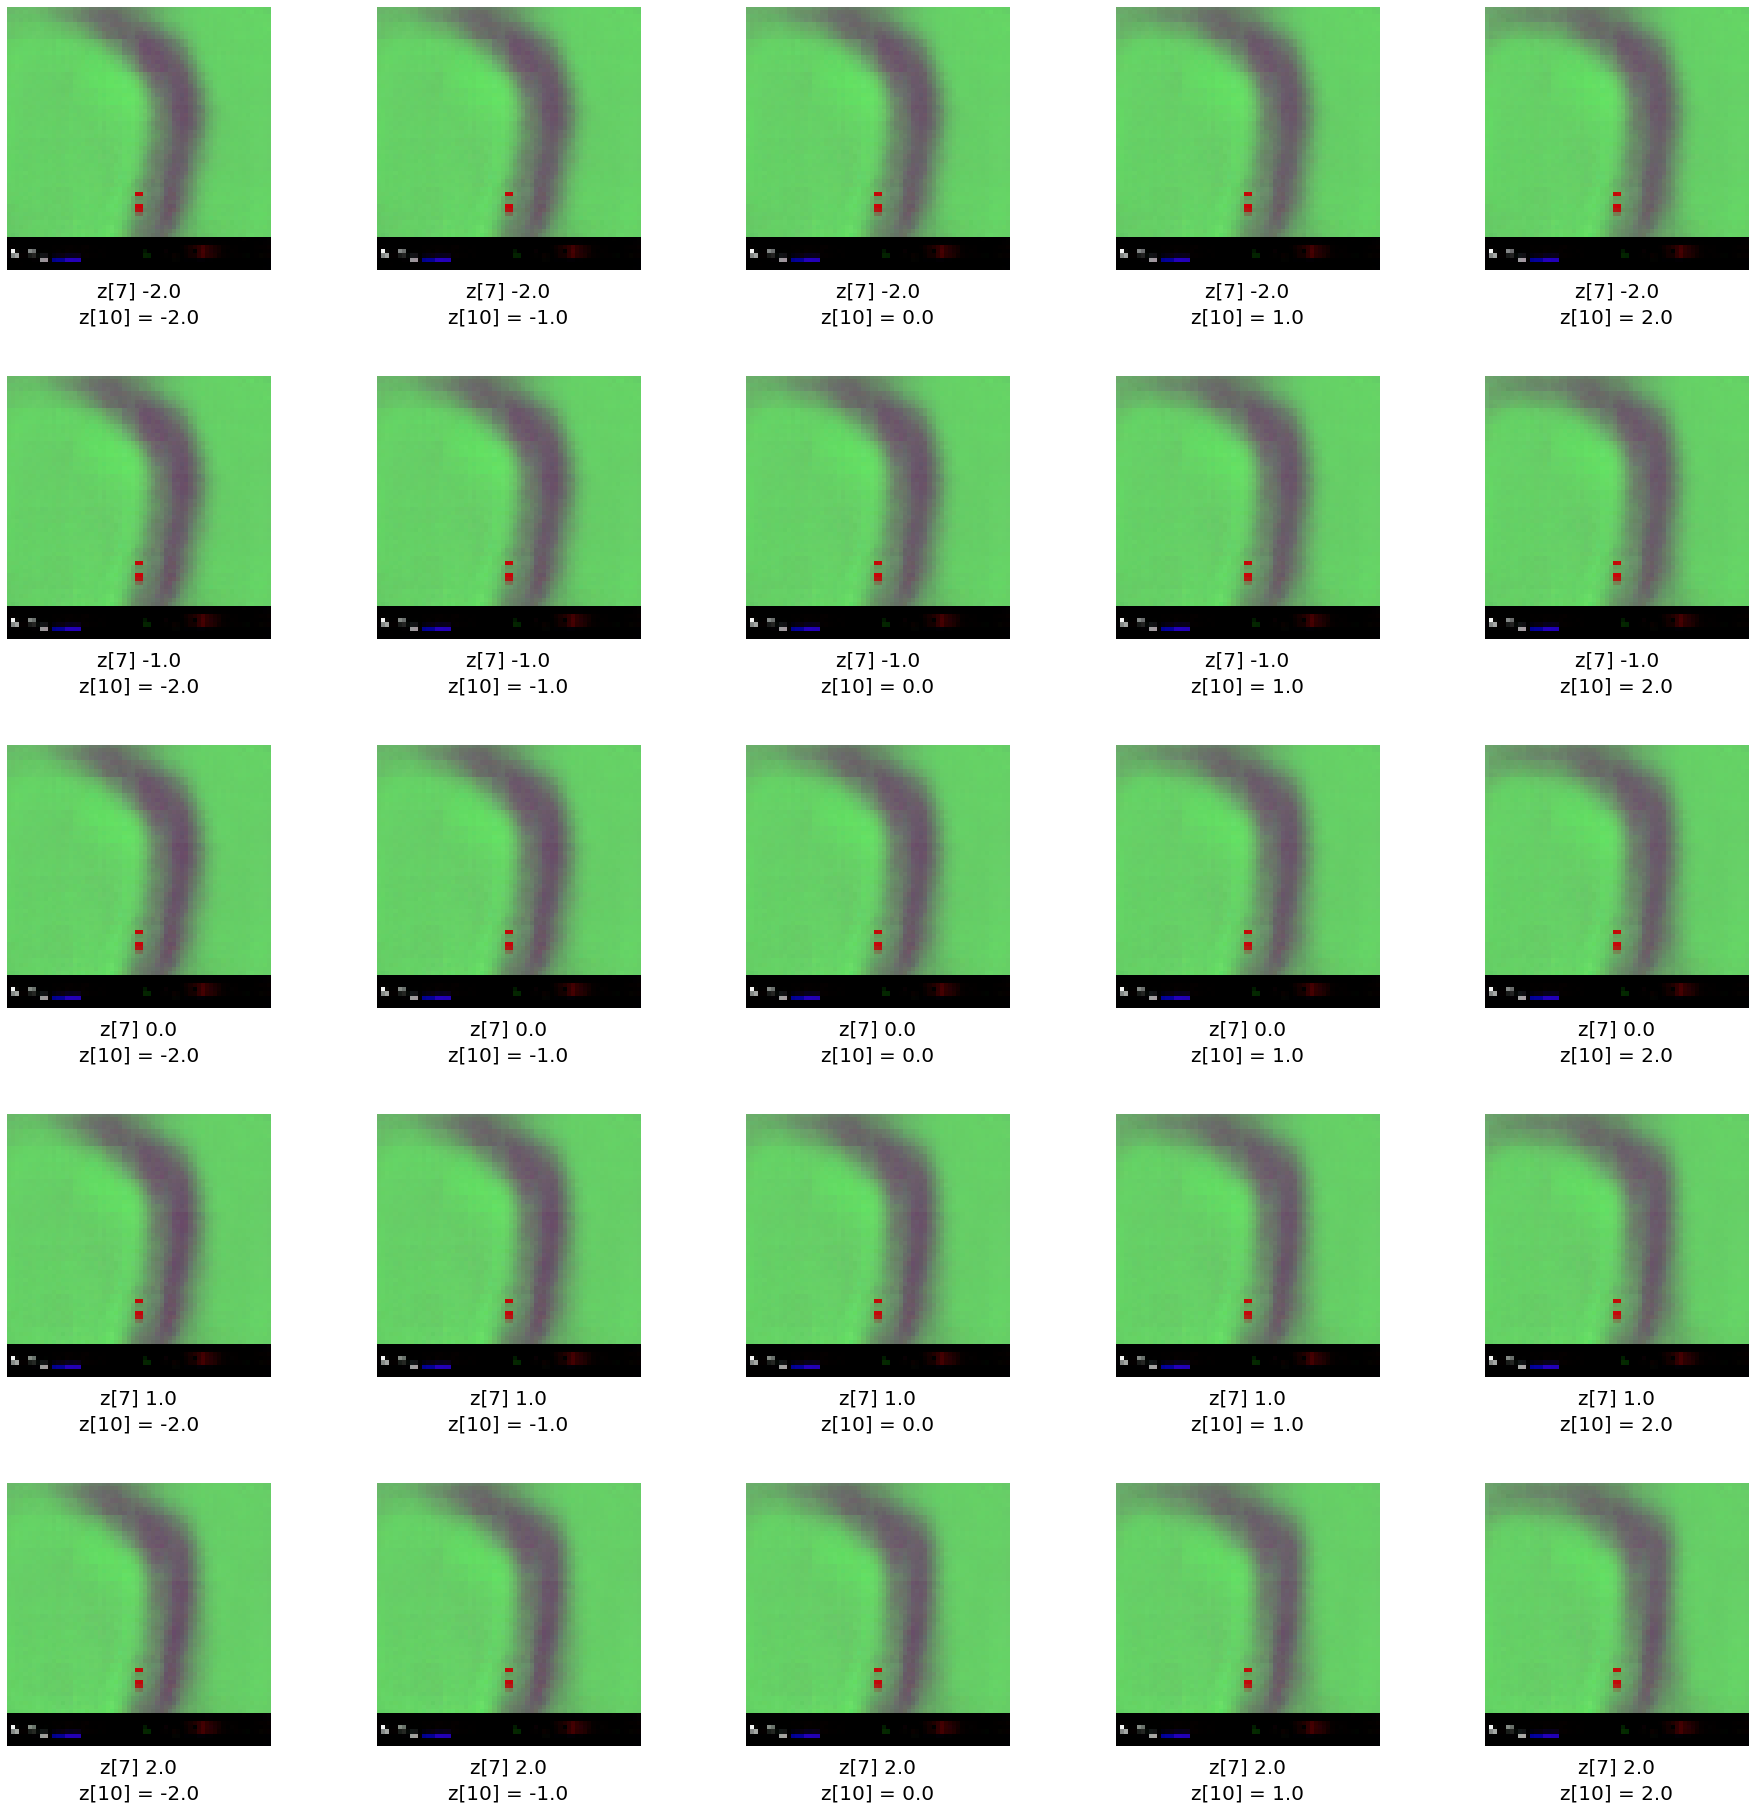

In [12]:
top_left = vae.encoder.predict(np.array([obs_data1[20]]))[2][0]
top_right = vae.encoder.predict(np.array([obs_data1[60]]))[2][0]
bottom_left = vae.encoder.predict(np.array([obs_data2[80]]))[2][0]
sample_z = vae.encoder.predict(np.array([obs_data[60]]))[2][0]

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(32,32), sharex=True, sharey=True)
plt.subplots_adjust(hspace = 0.4)

for x in range(5):
    for y in range(5):
        
        z = sample_z.copy()

#         z = top_left + (top_right - top_left) * x/8 + (bottom_left - top_left) * y/8
        z[7] = (x-2)
        z[10] = (y-2)
        
        decoded_obs = vae.decoder.predict(np.array([z]))[0]
        
        axes[x,y].set_axis_off()
        
        axes[x,y].imshow(decoded_obs)
        
        axes[x,y].text(0.5,-0.1, 'z[7] ' + str(np.round(z[7],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
        
        axes[x,y].text(0.5,-0.2, 'z[10] = ' + str(np.round(z[10],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
    

plt.show()

In [13]:
def play_with_z(z0 = sample_z[0]
                ,z2 = sample_z[2]
                ,z4 = sample_z[4]
                ,z5 = sample_z[5]
                ,z6 = sample_z[6]
                ,z7 = sample_z[7]
                ,z10 = sample_z[10]
                ,z15 = sample_z[15]
                ,z24= sample_z[24]
                ,z25= sample_z[25]
                ,z27= sample_z[27]
                ):
    z = sample_z.copy()
    z[0] = z0
    z[2] = z2
    z[4] = z4
    z[5] = z5
    z[6] = z6
    z[7] = z7
    z[10] = z10
    z[15] = z15
    z[24] = z24
    z[25] = z25
    z[27] = z27
    
    decoded_obs = vae.decoder.predict(np.array([z]))[0]
    plt.gca().cla() 
    plt.imshow( decoded_obs)

In [14]:
interact(play_with_z
        , z0=(-3.0,3.0,0.1)
        , z2=(-3.0,3.0,0.1)
        , z4=(-3.0,3.0,0.1)
        , z5=(-3.0,3.0,0.1)
        , z6=(-3.0,3.0,0.1)
        , z7=(-3.0,3.0,0.1)
        , z10=(-3.0,3.0,0.1)
        , z15=(-3.0,3.0,0.1)
        , z24=(-3.0,3.0,0.1)
        , z25=(-3.0,3.0,0.1)
        , z27=(-3.0,3.0,0.1)
        )

interactive(children=(FloatSlider(value=-0.10845605283975601, description='z0', max=3.0, min=-3.0), FloatSlide…

<function __main__.play_with_z(z0=-0.10845605, z2=-1.0280294, z4=-0.115715444, z5=1.1155548, z6=-0.50668293, z7=0.21302181, z10=-0.5833335, z15=-2.2661247, z24=-0.5684391, z25=0.17754644, z27=-0.29226846)>